## Predicting Medical Expenses using Regression

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataset

In [2]:
#File_Path = ".."+ os.path.sep + "Python-Practice-code" + os.path.sep + "insurance.csv"
File_Path = "insurance.csv"
medical = pd.read_csv(File_Path)

In [3]:
print(File_Path)

insurance.csv


In [4]:
type(medical)

pandas.core.frame.DataFrame

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
medical.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
### summarizing about the columns separately which are object or categorical type

In [9]:
print(medical.describe(include = ['object']))

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [10]:
## We have to predict the expense column i.e. how it varies with the change of other columns or attributes

### Exploratory Data Analysis of the dataset

In [11]:
# Histogram plot

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

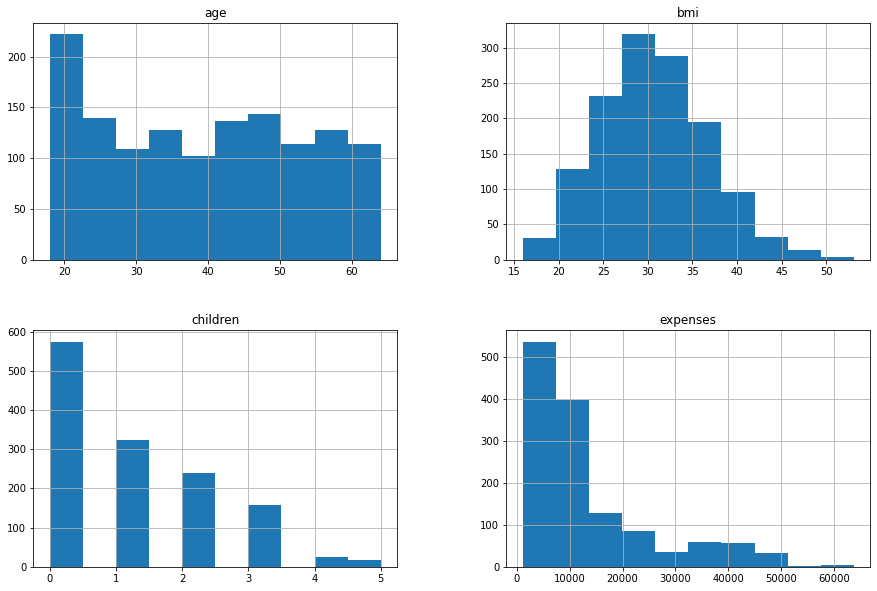

In [12]:
medical.hist(bins = 10, figsize=(15,10))

In [13]:
# Regression Plot

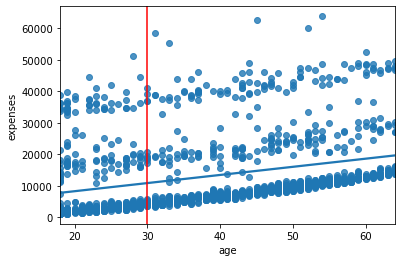

In [14]:
sns.regplot(x='age', y='expenses', data=medical,ci=None)
plt.axvline(30, color='r')

#### From this graph we can say that with the increase of age the expense is also increasing. In any particular age there are three distinguishable expense cluster and in the lowest cluster the dense of population is highest which is gradually decreasing for higher expense clusters. An example is shown here with the age '30'

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

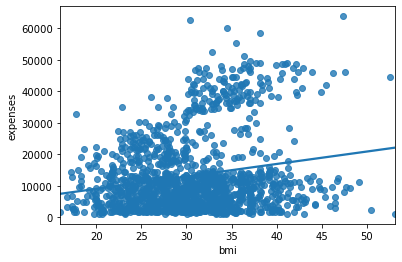

In [15]:
sns.regplot(x='bmi', y='expenses', data=medical,ci=None)

#### In this graph also we can see that the expense is gradually increasing with the increase of bmi.

<AxesSubplot:xlabel='sex', ylabel='count'>

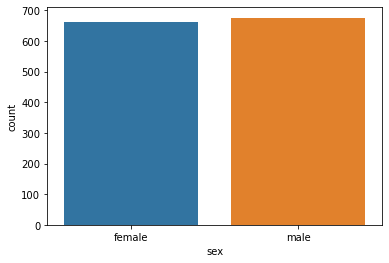

In [16]:
sns.countplot(x='sex',data=medical)

## Count of Male and Female are almost equal

Text(0, 0.5, 'mean_expenses')

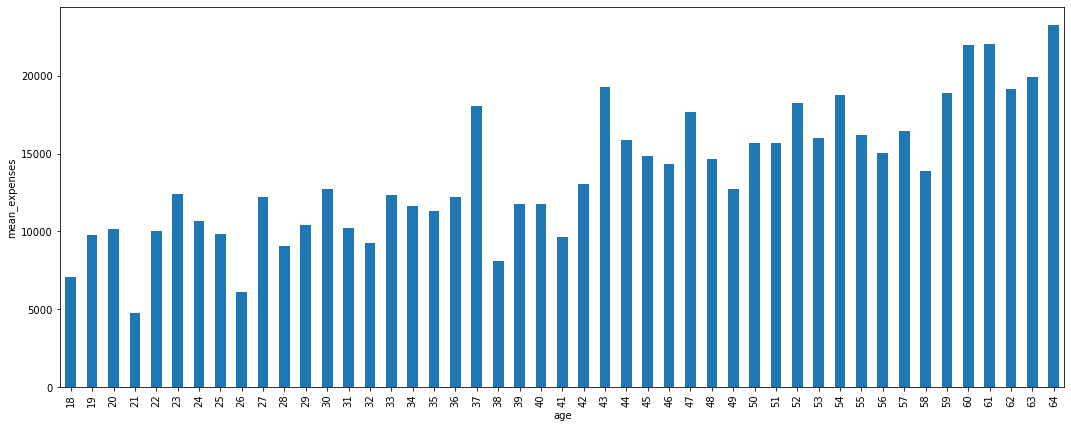

In [17]:
medical.groupby(by = 'age')['expenses'].mean().plot(kind = 'bar',figsize=(18,7))
plt.ylabel('mean_expenses')

#### If checking the mean expense for individual age group then we can see that as age increases the mean expense also increases

### Correlation

In [18]:
corr = medical.corr()

In [19]:
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

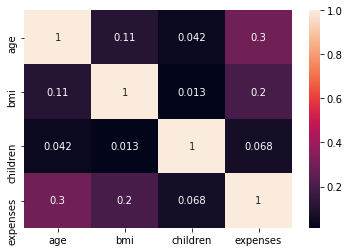

In [20]:
sns.heatmap(medical.corr(),annot= True)

In [21]:
corr.expenses.sort_values(ascending=False)

expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
Name: expenses, dtype: float64

### It can be said from the correlation values that , expenses are more likely to be impacted by age . Also it can be said that age and bmi have a very weak positive correlation with expense

In [22]:
np.min(medical.age)

18

In [23]:
np.max(medical.age)

64

In [24]:
len(medical.age.unique())

47

In [25]:
len(np.ceil(medical.age).unique())

47

In [26]:
medical['age_cat']=np.ceil(medical.age / 18)

In [27]:
len(medical.age_cat.value_counts().sort_index(ascending= True))

4

In [28]:
## Making some age category which can help in understanding categorywise mean expense 

In [29]:
medical.age_cat.value_counts().sort_index(ascending = True)

1.0     69
2.0    530
3.0    497
4.0    242
Name: age_cat, dtype: int64

In [30]:
count = medical.age_cat.value_counts()

<AxesSubplot:xlabel='age_cat', ylabel='count'>

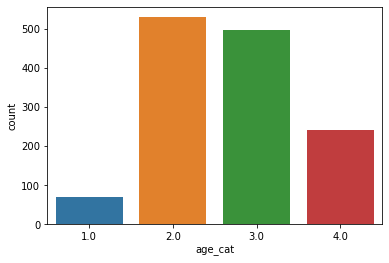

In [31]:
sns.countplot(x= 'age_cat', data= medical)

In [32]:
## IN age category 2 the count of people is higher than other categories

In [33]:
len(medical['bmi'].unique())

275

In [34]:
## Similar operation performed on BMI as age to check which category has higher average medical expense 

In [35]:
medical['bmi_cat']=np.ceil(medical.bmi / 16)

In [36]:
medical.bmi_cat.value_counts().sort_index(ascending=True)

1.0      1
2.0    802
3.0    530
4.0      5
Name: bmi_cat, dtype: int64

In [37]:
medical.bmi_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.000747
2.0    0.599402
3.0    0.396114
4.0    0.003737
Name: bmi_cat, dtype: float64

<AxesSubplot:xlabel='age'>

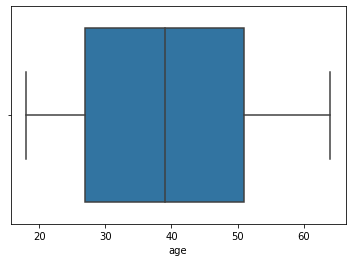

In [38]:
sns.boxplot(x='age', data=medical)

<AxesSubplot:xlabel='bmi'>

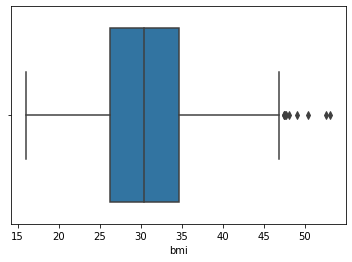

In [39]:
sns.boxplot(x='bmi', data=medical)

## Only BMI has few outliers , age doesn't have any outliers

### Plot of the Mean Expense vs Attributes

age_cat


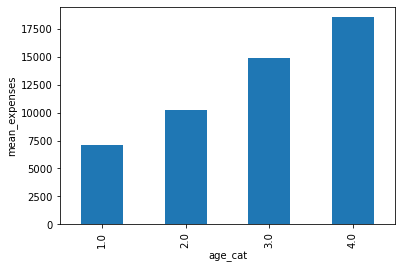

sex


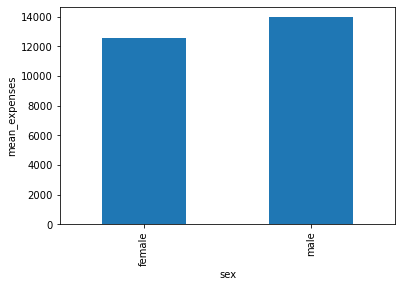

region


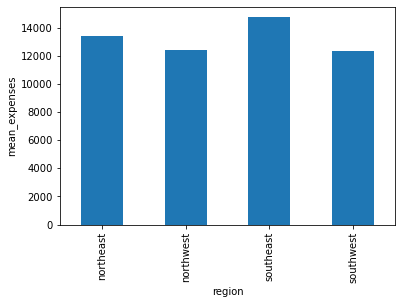

bmi_cat


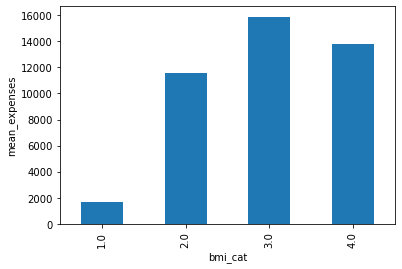

children


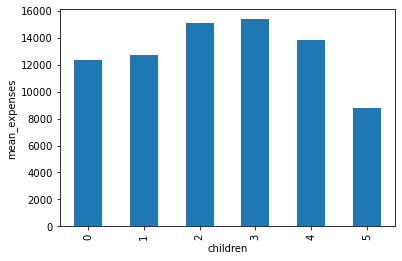

In [40]:
lst = ['age_cat','sex','region','bmi_cat','children']
for i in lst:
    data = medical.groupby(by = i)['expenses'].mean().plot(kind = 'bar')
    print(i)
    plt.ylabel('mean_expenses')
    plt.show()

#### Mean expense is highest for the age category 4.0 among all other age categories.
#### Mean expense is highest for Male among all genders.
#### Mean expense is higher for southwest region among all other regions.
#### Mean expense is higher for the bmi category 3.0 among all other categories of bmi.
#### Mean expense is higher for the category having 3 children followed by 2 children.

### Checking for the proportion of each age category in the dataset

In [41]:
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

In [42]:
medical = medical.drop('age_cat',axis=1)
medical = medical.drop('bmi_cat',axis=1)

In [43]:
medical

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [44]:
X = medical.drop('expenses', axis = 1)
y = medical['expenses']

In [45]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [46]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Splitting into test data and train data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

### checking whether percentage of train and test data set are according to the given ratio or not

In [50]:
(len(X_train)/len(medical))*100

79.97010463378177

In [51]:
(len(X_test)/len(medical))*100

20.029895366218238

In [52]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.1,0,yes,southeast
575,58,female,27.2,0,no,northwest
535,38,male,28.0,1,no,northeast
543,54,female,47.4,0,yes,southeast


In [53]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,20.0,2,no,northwest
1285,47,female,24.3,0,no,northeast
1142,52,female,24.9,0,no,southeast
969,39,female,34.3,5,no,southeast
486,54,female,21.5,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.4,4,no,northeast
1130,39,female,23.9,5,no,southeast
1294,58,male,25.2,0,no,northeast
860,37,female,47.6,2,yes,southwest


In [54]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [55]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

# Data Preprocessing

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


#### Separating numerical and categorical attributes

In [57]:
X_train_num = X_train.drop(['sex','smoker','region'],axis = 1)

In [58]:
X_train_num

,age,bmi,children
560,46,20.0,2
1285,47,24.3,0
1142,52,24.9,0
969,39,34.3,5
486,54,21.5,3
...,...,...,...
1095,18,31.4,4
1130,39,23.9,5
1294,58,25.2,0
860,37,47.6,2


In [59]:
X_train_cat = X_train[['sex','smoker','region']]

In [60]:
X_train_cat

,sex,smoker,region
560,female,no,northwest
1285,female,no,northeast
1142,female,no,southeast
969,female,no,southeast
486,female,no,northwest
...,...,...,...
1095,female,no,northeast
1130,female,no,southeast
1294,male,no,northeast
860,female,yes,southwest


In [61]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [62]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1070 non-null   object
 1   smoker  1070 non-null   object
 2   region  1070 non-null   object
dtypes: object(3)
memory usage: 33.4+ KB


#### We can see from the above that there are no null values in x_train and x_test itself. So most likely, we won't need null value imputation

# Scaling

In [63]:
### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_train_num_ndarray = scaler.fit_transform(X_train_num)

In [67]:
X_train_num_ndarray

array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211],
       [-0.16755139,  2.82063006,  0.73433626],
       [ 1.1120044 , -0.1096194 , -0.91119211]])

In [68]:
X_train_num_ndarray[:10]

array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       [-0.02537852,  0.6188042 ,  3.20262882],
       [ 1.04091797, -1.50024626,  1.55710045],
       [ 1.68069586,  1.81077008, -0.91119211],
       [-1.23384787, -1.03670397, -0.91119211],
       [-1.5181936 , -1.48369117, -0.91119211],
       [ 0.04570791,  1.76110483, -0.08842793],
       [-0.16755139,  0.60224912, -0.08842793]])

## OneHot Encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
hot_encoder = OneHotEncoder(sparse = False)

In [71]:
X_train_cat_hot_encoded_ndarray = hot_encoder.fit_transform(X_train_cat[['sex','smoker','region']].values)

In [72]:
X_train_cat.head(10)

,sex,smoker,region
560,female,no,northwest
1285,female,no,northeast
1142,female,no,southeast
969,female,no,southeast
486,female,no,northwest
170,male,no,southeast
277,female,no,southwest
1033,male,yes,northeast
209,male,no,northeast
947,male,yes,northeast


In [73]:
X_train_dummy_columns_df=pd.get_dummies(X_train_cat)

In [74]:
X_train_dummy_columns_df

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,1,0,1,0,0,1,0,0
1285,1,0,1,0,1,0,0,0
1142,1,0,1,0,0,0,1,0
969,1,0,1,0,0,0,1,0
486,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,1,0,1,0,1,0,0,0
1130,1,0,1,0,0,0,1,0
1294,0,1,1,0,1,0,0,0
860,1,0,0,1,0,0,0,1


In [75]:
hot_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [76]:
X_train_cat_hot_encoded_ndarray[:10]

array([[1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0.]])

## Combining Preprocessed Results on Train Dataset

In [77]:
X_train_final = np.c_[X_train_num_ndarray, X_train_cat_hot_encoded_ndarray]

In [78]:
X_train_final.shape

(1070, 11)

In [79]:
X_train_final

array([[ 0.47222651, -1.74857248,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03670397, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.93737348, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82063006,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.1096194 , -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

# Preprocessing on Test Dataset

In [80]:
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest


In [81]:
X_test_num = X_test.drop(['sex','smoker','region'],axis = 1)

In [82]:
X_test_cat = X_test[['sex','smoker','region']]

In [83]:
X_test_num.head()

,age,bmi,children
764,45,25.2,2
887,36,30.0,0
890,64,26.9,0
1293,46,25.7,3
259,19,31.9,0


In [84]:
X_test_cat.head()

,sex,smoker,region
764,female,no,northeast
887,female,no,northwest
890,female,yes,northwest
1293,male,no,northwest
259,male,yes,northwest


In [85]:
# Scaling on numerical Data
X_test_num_ndarray = scaler.transform(X_test_num)

In [86]:
X_test_num_ndarray[:10]

array([[ 0.40114007, -0.88770823,  0.73433626],
       [-0.23863782, -0.09306431, -0.91119211],
       [ 1.75178229, -0.60627185, -0.91119211],
       [ 0.47222651, -0.80493283,  1.55710045],
       [-1.44710717,  0.22148224, -0.91119211],
       [-0.38081068,  2.04254122, -0.08842793],
       [-1.44710717, -1.33469544, -0.91119211],
       [ 1.75178229,  1.21478714, -0.91119211],
       [-0.80732928, -2.19555969, -0.91119211],
       [ 0.6854858 , -0.30828038,  1.55710045]])

In [87]:
# One hot Encoding on Categorical Data
X_test_cat_hot_encoded_ndarray = hot_encoder.fit_transform(X_test_cat[['sex','smoker','region']].values)

In [88]:
hot_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [89]:
X_test_cat_hot_encoded_ndarray[:10]

array([[1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0.]])

## Combining Preprocessed Results on Test Dataset

In [90]:
X_test_final = np.c_[X_test_num_ndarray, X_test_cat_hot_encoded_ndarray]

In [91]:
X_test_final

array([[ 0.40114007, -0.88770823,  0.73433626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23863782, -0.09306431, -0.91119211, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.75178229, -0.60627185, -0.91119211, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.09646495, -0.42416595, -0.08842793, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04091797,  2.7875199 , -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82765867,  0.60224912, -0.08842793, ...,  0.        ,
         0.        ,  1.        ]])

In [92]:
X_train_final.shape, X_test_final.shape

((1070, 11), (268, 11))

# Using Model for prediction and calculation of MSE and RMSE

### Linear Regression model

In [93]:
X_train_final.shape

(1070, 11)

In [94]:
y_train.shape

(1070,)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
Lin_reg = LinearRegression()

In [97]:
Lin_reg.fit(X_train_final, y_train)

LinearRegression()

### prediction of y_train

In [98]:
y_pred_train_regression = Lin_reg.predict(X_train_final)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [101]:
type(y_train)

pandas.core.series.Series

In [102]:
y_pred_train_regression

array([ 7109.59839836,  8335.85245127,  9164.28274941, ...,
       11447.39258833, 37317.08335281, 11452.47075493])

In [103]:
type(y_pred_train_regression)

numpy.ndarray

In [104]:
mse_reg_train = mean_squared_error(y_train, y_pred_train_regression)

In [105]:
rmse_reg_train = np.sqrt(mse_reg_train)

In [106]:
rmse_reg_train

6105.245134876944

In [107]:
X_test_final.shape

(268, 11)

In [108]:
y_pred_test_regression = Lin_reg.predict(X_test_final)

In [109]:
mse_reg_test = mean_squared_error(y_test, y_pred_test_regression)

In [110]:
rmse_reg_test = np.sqrt(mse_reg_test)

In [111]:
rmse_reg_test

5796.556335884077

In [112]:
# Calculating R2 Score 
# R2 score helps to know how fit the model is for the problem
# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# Also known as coefficient of determination
# basically varies from 0 to 1 or 0% to 100% 
# 0% means the model explains none of the variability of the data around the mean
# 100% means the model explains all the variablity of the data around the mean
# It can be negative also when the model is extremely worse.
# If a model always gives the expected value of y disregarding the features then it gets R2 score as 0
# Higher the score better the model will be fit for the problem

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2_score(y_train, y_pred_train_regression)

0.7417509671301924

In [115]:
r2_score(y_test, y_pred_test_regression)

0.7835726930039905

In [116]:
Lin_reg.coef_

array([ 3.61469763e+03,  2.03726855e+03,  5.17330947e+02,  9.25987035e+00,
       -9.25987035e+00, -1.18251562e+04,  1.18251562e+04,  4.59563943e+02,
        8.92504316e+01, -1.99148439e+02, -3.49665935e+02])

In [117]:
Lin_reg.intercept_

20311.705068957293

In [184]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [187]:
y_pred_test_regression[:5]

array([ 8976.76760964,  7061.47078348, 36861.00837958,  9439.16742899,
       26965.82783567])

In [188]:
residual = y_test - y_pred_test_regression

In [189]:
residual

764       118.302390
887     -1789.290783
890     -7530.028380
1293     -137.277429
259      6784.462164
            ...     
109      7992.770113
575       452.758236
535     -1611.144902
543     22853.314889
846     -2446.375368
Name: expenses, Length: 268, dtype: float64

<AxesSubplot:xlabel='expenses', ylabel='Count'>

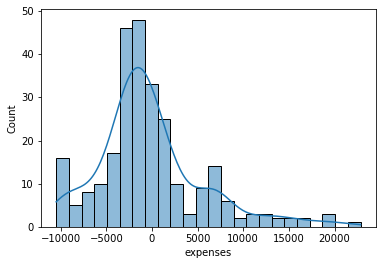

In [191]:
sns.histplot(residual, kde=True)

## Using Statsmodel for OLS

In [118]:
import statsmodels.api as sm

In [119]:
x = sm.add_constant(X_test_final)

In [120]:
x

array([[ 1.        ,  0.40114007, -0.88770823, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.23863782, -0.09306431, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.75178229, -0.60627185, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.09646495, -0.42416595, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.04091797,  2.7875199 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.82765867,  0.60224912, ...,  0.        ,
         0.        ,  1.        ]])

In [121]:
type(y_test)

pandas.core.series.Series

In [122]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [123]:
#num_columns_scaled_df=pd.DataFrame(scaler.fit_transform(num_columns_df),columns=num_columns_df.columns)

In [124]:
X_test_num_columns_scaled_df = pd.DataFrame(X_test_num_ndarray, columns=X_test_num.columns)

In [125]:
X_test_num_columns_scaled_df.head()

,age,bmi,children
0,0.401140,-0.887708,0.734336
1,-0.238638,-0.093064,-0.911192
2,1.751782,-0.606272,-0.911192
3,0.472227,-0.804933,1.557100
4,-1.447107,0.221482,-0.911192


In [126]:
X_test_dummy_columns_df=pd.get_dummies(X_test_cat)

In [127]:
X_test_dummy_columns_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,1,0,1,0,1,0,0,0
887,1,0,1,0,0,1,0,0
890,1,0,0,1,0,1,0,0
1293,0,1,1,0,0,1,0,0
259,0,1,0,1,0,1,0,0


In [128]:
X_test.shape

(268, 6)

In [129]:
X_test_num_columns_scaled_df.shape

(268, 3)

In [130]:
X_test_dummy_columns_df.shape

(268, 8)

In [131]:
X_test_num_columns_scaled_df.index

RangeIndex(start=0, stop=268, step=1)

In [132]:
X_test_dummy_columns_df.index

Int64Index([ 764,  887,  890, 1293,  259, 1312,  899,  752, 1286,  707,
            ...
             900,  708,   54,  370,  741,  109,  575,  535,  543,  846],
           dtype='int64', length=268)

In [133]:
X_test_num_columns_scaled_df.index = X_test_dummy_columns_df.index

In [134]:
df_test = pd.concat([X_test_num_columns_scaled_df, X_test_dummy_columns_df],axis=1)

In [135]:
df_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.401140,-0.887708,0.734336,1,0,1,0,1,0,0,0
887,-0.238638,-0.093064,-0.911192,1,0,1,0,0,1,0,0
890,1.751782,-0.606272,-0.911192,1,0,0,1,0,1,0,0
1293,0.472227,-0.804933,1.557100,0,1,1,0,0,1,0,0
259,-1.447107,0.221482,-0.911192,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,1.680696,0.751245,-0.911192,0,1,0,1,0,0,1,0
575,1.325264,-0.556607,-0.911192,1,0,1,0,0,1,0,0
535,-0.096465,-0.424166,-0.088428,0,1,1,0,1,0,0,0
543,1.040918,2.787520,-0.911192,1,0,0,1,0,0,1,0


In [136]:
df_test.shape

(268, 11)

In [137]:
model = sm.OLS(y_test, df_test)

In [138]:
results = model.fit()

In [139]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     121.7
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.57e-83
Time:                        09:24:06   Log-Likelihood:                -2698.6
No. Observations:                 268   AIC:                             5415.
Df Residuals:                     259   BIC:                             5447.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3552.8547    364.377  

#### For train set the R2 score is approx 74.17% and for test set it's almost 78.36%

### Linear Regression Model can describe 74% variability of the train set and 78% variability of the test dataset

## Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
tree_reg = DecisionTreeRegressor()

In [142]:
tree_reg.fit(X_train_final, y_train)

DecisionTreeRegressor()

In [143]:
y_pred_train_tree = tree_reg.predict(X_train_final)

In [144]:
mse_tree_train = mean_squared_error(y_train, y_pred_train_tree)

In [145]:
mse_tree_train

244239.68681906545

In [146]:
np.sqrt(mse_tree_train)

494.2061177475097

In [147]:
r2_score(y_train, y_pred_train_tree)

0.9983078115527046

In [148]:
y_pred_test_tree = tree_reg.predict(X_test_final)

In [149]:
mse_tree_test = mean_squared_error(y_test, y_pred_test_tree)

In [150]:
rmse_tree_test = np.sqrt(mse_tree_test)

In [151]:
rmse_tree_test

6533.94397678411

In [152]:
r2_score(y_test, y_pred_test_tree)

0.7250062988157878

### Decision Tree seems to be overfitting as it has a low rmse for train set and high rmse for test set

## KNN (K- Nearest Neighbour)

In [153]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [154]:
model = KNR(n_neighbors = 3)     # Taking nearest neighbors as 3 

In [155]:
model.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=3)

In [156]:
y_train_pred_KNR = model.predict(X_train_final)

In [157]:
y_train_pred_KNR

array([ 8761.28666667,  8685.83      , 15851.03333333, ...,
       11806.83      , 34617.64      , 10343.50666667])

In [158]:
y_train[:5]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [159]:
y_test_pred_KNR = model.predict(X_test_final)

In [160]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [161]:
y_test_pred_KNR[:5]

array([ 8650.57666667,  5166.49      , 27923.53666667,  8192.86      ,
       23960.94333333])

In [162]:
train_rmse_error_KNR = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))

In [163]:
print("The train set error is :", train_rmse_error_KNR)

The train set error is : 3957.3938986155636


In [164]:
test_rmse_error_KNR = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

In [165]:
print("The test set error is :", test_rmse_error_KNR)

The test set error is : 5965.088633728437


### For Test set the error is quite higher than the train set

## Trying different value of K to check which value gives lowest RMSE

In [166]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(20):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 6797.397375508852
R2 score for value k=  1 is: 0.7023833304700553
RMSE value for k=  2 is: 6070.679668785228
R2 score for value k=  2 is: 0.7626186651814855
RMSE value for k=  3 is: 5965.088633728437
R2 score for value k=  3 is: 0.7708046851396309
RMSE value for k=  4 is: 6014.01625207048
R2 score for value k=  4 is: 0.7670293946244614
RMSE value for k=  5 is: 5994.926930376936
R2 score for value k=  5 is: 0.7685060094354546
RMSE value for k=  6 is: 6153.031859207983
R2 score for value k=  6 is: 0.7561345580634449
RMSE value for k=  7 is: 6096.36333118264
R2 score for value k=  7 is: 0.760605803515667
RMSE value for k=  8 is: 6095.445705684654
R2 score for value k=  8 is: 0.7606778653906352
RMSE value for k=  9 is: 6179.4036488590245
R2 score for value k=  9 is: 0.7540396720872689
RMSE value for k=  10 is: 6136.475111820726
R2 score for value k=  10 is: 0.7574451920219223
RMSE value for k=  11 is: 6118.933483689218
R2 score for value k=  11 is: 0.75882993645764

## For Test Dataset we are taking K value as the square root of Total Test Dataset and checking which K value gives lowest RMSE 

In [167]:
rmse_val_list = list() #to store rmse values for different k
rmse_val_df = pd.DataFrame(columns=["K","Error"])

iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    
    
    rmse_val_list.append(error) #store rmse values
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  5965.088633728437
The corresponding K value is  3


In [168]:
rmse_df = pd.DataFrame(rmse_val_df).set_index('K')
rmse_df

,Error
K,
1.0,6797.397376
2.0,6070.679669
3.0,5965.088634
4.0,6014.016252
5.0,5994.926930
6.0,6153.031859
7.0,6096.363331
8.0,6095.445706
9.0,6179.403649


<AxesSubplot:xlabel='K'>

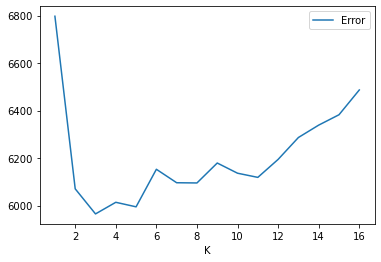

In [169]:
rmse_df.plot()

### As we can see that for k value 3 the error is minimum . After k=3 the error value is increasing and again at around k=5 the error became a bit low. Thereby gradually increasing it became low again at k=7 But the error value is not that much low as it is at k=3. So probably we need to fix the k value at 3

In [170]:
#from sklearn.model_selection import cross_val_score

In [171]:
#mses_model = -cross_val_score(model, X_train_final, y_train, cv = 5, scoring = 'neg_mean_squared_error')

In [172]:
#mses_model

## Grid Search

In [173]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(3,50,2),'weights':['uniform', 'distance'],'p':[1,2]}

In [174]:
gserach = GridSearchCV(estimator=model,param_grid=params,cv=5)

gserach.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=16),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [175]:
gserach.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [176]:
model_best = KNR(n_neighbors = 7,p=1,weights='distance')

In [177]:
model_best.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [178]:
y_train_pred_KNR = model_best.predict(X_train_final)

In [179]:
y_test_pred_KNR = model_best.predict(X_test_final)

In [180]:
y_train_pred_KNR

array([ 9193.84,  8534.67, 27117.99, ..., 11931.13, 46113.51, 10214.64])

In [181]:
y_test_pred_KNR[:5]

array([ 8977.7056049 ,  5394.47760677, 27768.86838406, 12212.43921418,
       22167.37725395])

## Checking the error and R2 score for test dataset with the parameter after grid search

In [182]:
r2_score(y_test,y_test_pred_KNR)

0.794204218356382

In [183]:
np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

5652.39192789499

## We can see here that after grid search with the best param value k=7, the root mean squared error for the train dataset has been reduced from 5965.08 to 5652.39.

## With the change in value of K from 3 to 7 we are reducing root mean square error around 312.69. But as we know increasing k value sometimes increase the complexity of the model. So for changing k value from 3 to 7 we may need the advice from any domain expert in this field.